In [47]:

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import sqlite3 

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [48]:
df = pd.read_excel('algoritmo.xlsx')

In [49]:
df.shape

(68, 15)

In [50]:
df.head(60)

,bairro,proprietario,tipo_proprietario,ocupacao,diaria,ar_condicionado,wifi,tv,microondas,geladeira,frigobar,maquina_lavar,piscina,academia,estacionamento
0,Vila Olimpia,Leda,Pessoa Fisica,0.20,230,1,1,1,1,1,0,0,1,1,1
1,Vila Olimpia,Eliete,Pessoa Fisica,0.81,146,1,1,1,1,0,1,0,1,1,1
2,Vila Olimpia,six,Pessoa Juridica,0.44,200,1,1,1,1,1,0,0,1,1,1
3,Vila Olimpia,Autentico,Pessoa Juridica,0.28,160,1,1,1,1,0,1,0,1,1,1
4,Vila Olimpia,Valmir,Pessoa Fisica,0.42,210,1,1,1,0,0,0,0,0,1,1
5,Vila Olimpia,João Vitor,Pessoa Fisica,0.68,280,1,1,1,1,1,0,0,1,1,1
6,Vila Olimpia,Ricardo,Pessoa Fisica,0.52,192,1,1,1,1,0,1,0,1,1,1
7,Vila Olimpia,Cibele,Pessoa Fisica,0.90,240,1,1,1,1,0,1,0,1,1,1
8,Vila Olimpia,Nadia,Pessoa Fisica,0.40,200,1,1,1,1,1,0,0,1,1,1
9,Vila Olimpia,Valmir,Pessoa Fisica,0.47,231,1,1,1,0,0,0,0,1,1,1


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bairro             68 non-null     object 
 1   proprietario       68 non-null     object 
 2   tipo_proprietario  68 non-null     object 
 3   ocupacao           68 non-null     float64
 4   diaria             68 non-null     int64  
 5   ar_condicionado    68 non-null     int64  
 6   wifi               68 non-null     int64  
 7   tv                 68 non-null     int64  
 8   microondas         68 non-null     int64  
 9   geladeira          68 non-null     int64  
 10  frigobar           68 non-null     int64  
 11  maquina_lavar      68 non-null     int64  
 12  piscina            68 non-null     int64  
 13  academia           68 non-null     int64  
 14  estacionamento     68 non-null     int64  
dtypes: float64(1), int64(11), object(3)
memory usage: 8.1+ KB


In [52]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ocupacao,68.0,0.651471,0.220923,0.03,0.5,0.7,0.80,1.0
diaria,68.0,219.191176,76.099749,100.00,152.0,200.0,276.25,375.0
ar_condicionado,68.0,1.000000,0.000000,1.00,1.0,1.0,1.00,1.0
wifi,68.0,1.000000,0.000000,1.00,1.0,1.0,1.00,1.0
tv,68.0,0.985294,0.121268,0.00,1.0,1.0,1.00,1.0
microondas,68.0,0.882353,0.324585,0.00,1.0,1.0,1.00,1.0
geladeira,68.0,0.632353,0.485750,0.00,0.0,1.0,1.00,1.0
frigobar,68.0,0.352941,0.481438,0.00,0.0,0.0,1.00,1.0
maquina_lavar,68.0,0.323529,0.471301,0.00,0.0,0.0,1.00,1.0
piscina,68.0,0.852941,0.356798,0.00,1.0,1.0,1.00,1.0


In [53]:
df.tipo_proprietario.value_counts()

Pessoa Fisica      53
Pessoa Juridica    15
Name: tipo_proprietario, dtype: int64

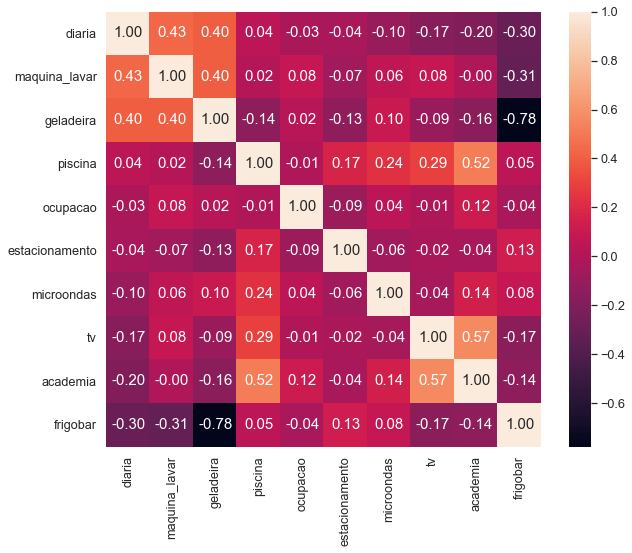

In [54]:
#Identificando as variáveis que estão mais correlacionadas

corrmat = df.corr()
cols = corrmat.nlargest(11, 'diaria')['diaria'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.15)
f, ax = plt.subplots(figsize=(10, 8))
hm = sns.heatmap(cm, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 15}, 
                 yticklabels=cols.values, 
                 xticklabels=cols.values)

In [55]:
df.corr()['diaria'].sort_values(ascending=False)

diaria             1.000000
maquina_lavar      0.433952
geladeira          0.400043
piscina            0.044477
ocupacao          -0.029340
estacionamento    -0.036431
microondas        -0.100589
tv                -0.171127
academia          -0.196644
frigobar          -0.298036
ar_condicionado         NaN
wifi                    NaN
Name: diaria, dtype: float64

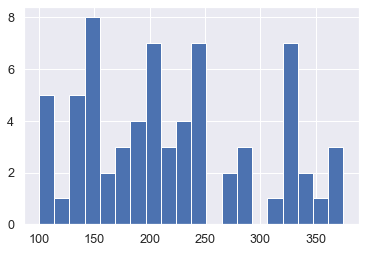

In [56]:
# distribuição dos dados de diaria 

plt.hist(df.diaria, bins=20);

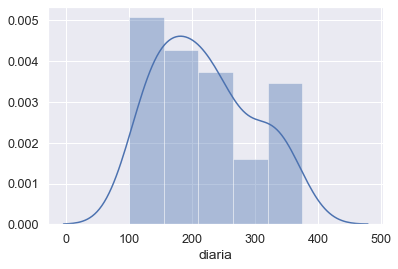

In [57]:
sns.distplot(df['diaria'])

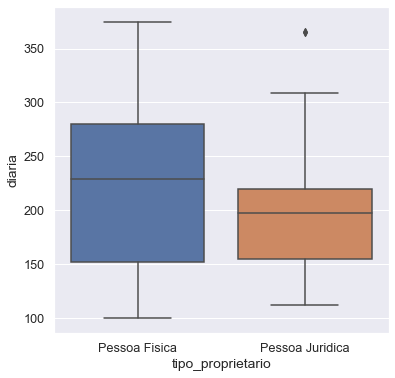

In [58]:
plt.figure(figsize=(6,6))

x = df['tipo_proprietario']
y = df['diaria']

sns.boxplot(x, y);

In [59]:
# Listando todas as colunas com os dados
list(df.columns)

['bairro',
 'proprietario',
 'tipo_proprietario',
 'ocupacao',
 'diaria',
 'ar_condicionado',
 'wifi',
 'tv',
 'microondas',
 'geladeira',
 'frigobar',
 'maquina_lavar',
 'piscina',
 'academia',
 'estacionamento']

In [60]:
# regressão linear do preço
function1 = ''' 
diaria ~ ocupacao
+maquina_lavar
+ geladeira
+ piscina
+ academia
+ frigobar 
+ microondas
+ estacionamento
+ wifi
+ tv
'''

model5 = smf.ols(formula=function1, data=df).fit()
print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:                 diaria   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     3.552
Date:                Wed, 20 May 2020   Prob (F-statistic):            0.00144
Time:                        13:09:03   Log-Likelihood:                -375.64
No. Observations:                  68   AIC:                             771.3
Df Residuals:                      58   BIC:                             793.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        188.2372     52.885      3.

In [61]:
model5.predict().shape

(68,)

In [62]:
#  correlação entre os valores reais e os valores preditos
np.sqrt(model5.rsquared)

0.5960702055843045

In [63]:
# Criando uma coluna no DataFrmae com o valores preditos 
df['yhat'] = model5.predict()

In [64]:
#  coluna no DataFrame apenas com valores dos ERROS
df['margem'] = df['yhat'] - df['diaria']

In [65]:
df.head(100)

,bairro,proprietario,tipo_proprietario,ocupacao,diaria,ar_condicionado,wifi,tv,microondas,geladeira,frigobar,maquina_lavar,piscina,academia,estacionamento,yhat,margem
0,Vila Olimpia,Leda,Pessoa Fisica,0.20,230,1,1,1,1,1,0,0,1,1,1,221.330771,-8.669229
1,Vila Olimpia,Eliete,Pessoa Fisica,0.81,146,1,1,1,1,0,1,0,1,1,1,168.806661,22.806661
2,Vila Olimpia,six,Pessoa Juridica,0.44,200,1,1,1,1,1,0,0,1,1,1,218.238496,18.238496
3,Vila Olimpia,Autentico,Pessoa Juridica,0.28,160,1,1,1,1,0,1,0,1,1,1,175.635435,15.635435
4,Vila Olimpia,Valmir,Pessoa Fisica,0.42,210,1,1,1,0,0,0,0,0,1,1,171.372174,-38.627826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,Vila Olimpia,Housi (frigobar),Pessoa Juridica,0.80,185,1,1,1,1,0,1,1,1,1,1,224.844663,39.844663
64,Vila Olimpia,Housi (frigobar),Pessoa Juridica,0.30,185,1,1,1,1,0,1,1,1,1,1,231.286904,46.286904
65,Vila Olimpia,Housi (geladeira),Pessoa Juridica,0.80,220,1,1,1,1,1,0,1,1,1,1,269.509241,49.509241
66,Vila Olimpia,Housi (geladeira),Pessoa Juridica,0.30,220,1,1,1,1,1,0,1,1,1,1,275.951481,55.951481


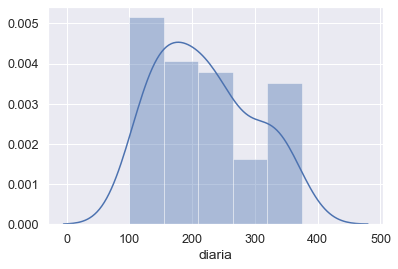

In [31]:
#HOJE

sns.distplot(df['diaria'])

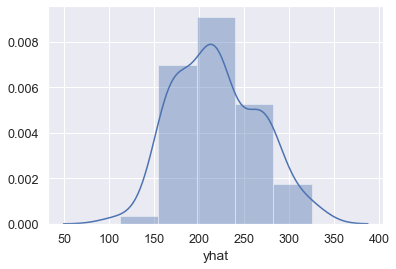

In [32]:
#preço de máxima eficiência

sns.distplot(df['yhat'])

In [36]:
#raiz da média dos erros quadráticos
#np.sqrt(mean_squared_error(df.diaria, df.yhat))

In [34]:
#Criando uma coluna dos ERROS Padronizados pela divisão dos ERROS pelo desvio-padrão
#df['erro_em_desvios'] = df['erro']/df['erro'].std()

In [613]:
# curva densidade de probabilidade dos ERROS Padronizados
#f['erro_em_desvios'].plot.kde(xlim = (-8, 6) )

In [614]:
# filtro pelo critério de 2 desvios-padrão da média dos ERROS
#mascara_prob = (df['erro_em_desvios']<1.96) & (df['erro_em_desvios']>-1.96)

In [615]:
#  valores removidos
#df[~mascara_prob].shape

In [616]:

#df[mascara_prob].shape

In [617]:

#df[mascara_prob].shape[0]/df.shape[0]

In [618]:
# Criando uma máscara para os valores de 6 desvios-padrão da média dos ERROS Padronizados
#mascara_raridade_9999 = (df['erro_em_desvios']<6) & (df['erro_em_desvios']>-6)

In [619]:
# Verificando o número de casas removidas
#df[~mascara_raridade_9999].shape[0]

In [621]:
# Rodando uma regressão com a estratégia 6 sigma de remoção de outliers

#function6 = ''' 
#diaria ~ ocupacao

#'''

#model6 = smf.ols(function6, df[mascara_raridade_9999]).fit()
#print(model6.summary())

In [622]:
# Criando uma coluna no DataFrmae com o valores preditos 
#df['yhat2'] = model6.predict()